https://www.kaggle.com/datasets/shivamb/netflix-shows

**About this Dataset:** Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

*Task Ideas*
Understanding what content is available in different countries
Identifying similar content by matching text-based features
Network analysis of Actors / Directors and find interesting insights
Does Netflix has more focus on TV Shows than movies in recent years.


https://drive.google.com/file/d/1NvfSXXNgW54R9AoB7kG0TRGB5-Avshga/view?usp=share_link

In [ ]:
! gdown --id 1NvfSXXNgW54R9AoB7kG0TRGB5-Avshga

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1NvfSXXNgW54R9AoB7kG0TRGB5-Avshga
To: /content/netflix_titles.csv
100% 3.40M/3.40M [00:00<00:00, 243MB/s]


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt

In [ ]:
netflix_df = pd.read_csv('/content/netflix_titles.csv')

In [ ]:
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# разделю общий df на отдельные df с сериалами и кино
netflix_shows = netflix_df[netflix_df['type'] == 'TV Show'].copy()
netflix_movies = netflix_df[netflix_df['type'] == 'Movie'].copy()

In [ ]:
netflix_df.groupby('type')['type'].count()

type
Movie      6131
TV Show    2676
Name: type, dtype: int64

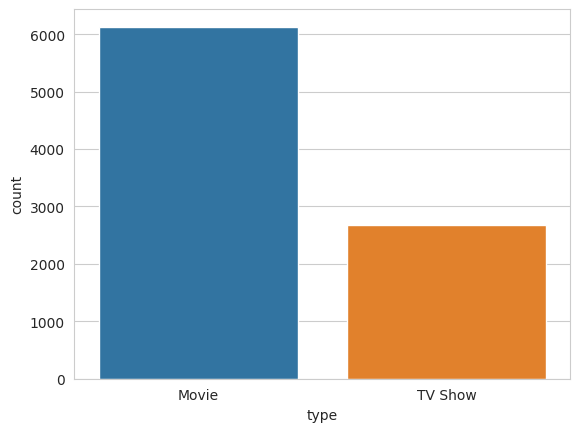

In [ ]:
fig = sns.countplot(data=netflix_df, x='type')

In [ ]:
# топ по продолжительности
topdir = pd.value_counts(netflix_df['duration'])
topdir[:10]

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
97 min        146
93 min        146
91 min        144
95 min        137
96 min        130
Name: duration, dtype: int64

**EDA фильмов**

In [ ]:
# поиск пропусков
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
# В date_added всего 10 пропусков, ими можно принебречь
netflix_date = netflix_df[['date_added']].dropna()
netflix_date.isna().sum()

date_added    0
dtype: int64

In [ ]:
netflix_date

,date_added
0,"September 25, 2021"
1,"September 24, 2021"
2,"September 24, 2021"
3,"September 24, 2021"
4,"September 24, 2021"
...,...
8802,"November 20, 2019"
8803,"July 1, 2019"
8804,"November 1, 2019"
8805,"January 11, 2020"


In [ ]:
# достаю месяц и год из date_added
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])
netflix_date.head()

,date_added,year,month
0,"September 25, 2021",2021,September
1,"September 24, 2021",2021,September
2,"September 24, 2021",2021,September
3,"September 24, 2021",2021,September
4,"September 24, 2021",2021,September


In [ ]:
netflix_date.sort_values(by=['year', 'month'])

,date_added,year,month
6611,"February 4, 2008",2008,February
5957,"January 1, 2008",2008,January
5956,"May 5, 2009",2009,May
5955,"November 18, 2009",2009,November
7370,"November 1, 2010",2010,November
...,...,...,...
178,"September 1, 2021",2021,September
179,"September 1, 2021",2021,September
180,"September 1, 2021",2021,September
181,"September 1, 2021",2021,September


In [ ]:
# создам таблицу добавления контента на платформу по месяцам и годам
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][:-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
df

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,,,,,
January,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,43.0,72.0,129.0,153.0,205.0,132.0
February,1.0,0.0,0.0,0.0,1.0,0.0,2.0,4.0,15.0,82.0,87.0,148.0,114.0,109.0
March,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,17.0,125.0,173.0,172.0,137.0,112.0
April,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,22.0,93.0,115.0,162.0,177.0,188.0
May,0.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,13.0,86.0,97.0,139.0,157.0,132.0
June,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,18.0,94.0,78.0,168.0,156.0,207.0
July,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,28.0,79.0,152.0,157.0,146.0,257.0
August,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,34.0,115.0,164.0,131.0,129.0,178.0
September,0.0,0.0,0.0,1.0,0.0,2.0,1.0,7.0,48.0,113.0,124.0,123.0,168.0,183.0


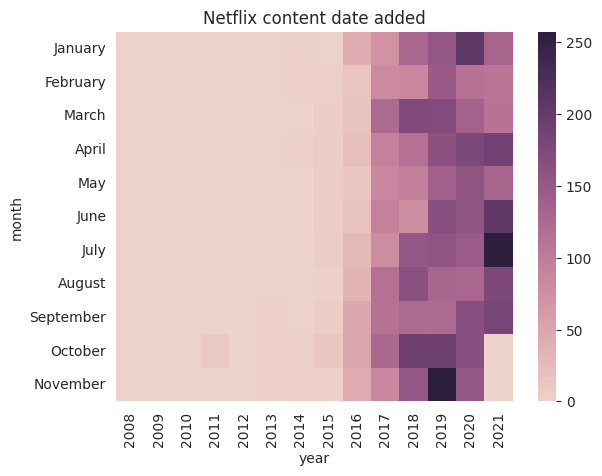

In [ ]:
fig = sns.heatmap(df, cmap=sns.cubehelix_palette(as_cmap=True))\
.set(title='Netflix content date added')

*Таким образом, наиболее привлекательными для релиза контента на платформе являются наименее 'загруженные' другим контентом месяцы. До 2015 практически ничего не выпускалось, затем наблюдается стремительный рост релизов, особенно в период зимних праздников и отпусков (когда у людей есть время потреблять контент). Рекомендовано рассмотреть февраль-март.*

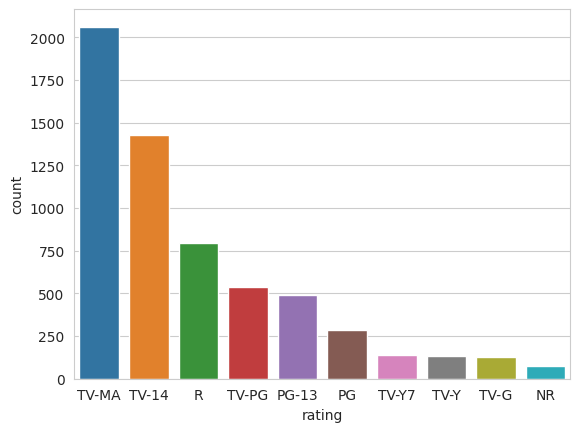

In [ ]:
# топ 10 rating фильмов

fig = sns.countplot(data=netflix_movies, x='rating',\
                    order=netflix_movies['rating'].value_counts().index[:10])
# TV-MA == 17+
# TV-14 == 14+
# .etc

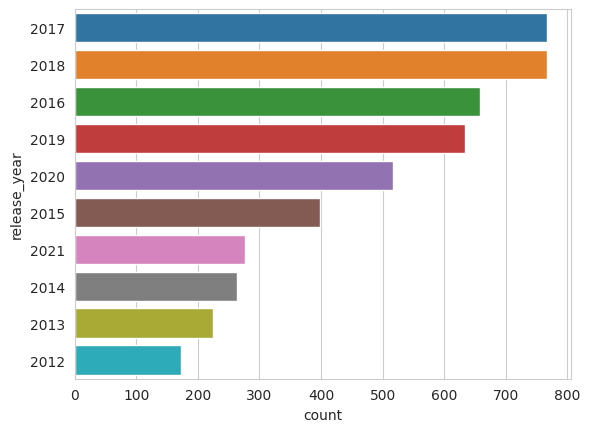

In [ ]:
# топ релизы
fig = sns.countplot(data=netflix_movies, y='release_year',\
                    order=netflix_movies['release_year'].value_counts().index[:10])

In [ ]:
# поиск пропусков в country
netflix_movies.isna().sum()

show_id           0
type              0
title             0
director        188
cast            475
country         440
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

In [ ]:
# т.к пропусков довольно много, не стоит их просто выкидывать, заменю на 'Unknown'

In [ ]:
netflix_movies['country'].fillna('Unknown', inplace=True)
netflix_movies.isna().sum()

show_id           0
type              0
title             0
director        188
cast            475
country           0
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

In [ ]:
netflix_movies['country'].value_counts()

United States                            2058
India                                     893
Unknown                                   440
United Kingdom                            206
Canada                                    122
                                         ... 
United Kingdom, Russia, United States       1
Paraguay, Argentina                         1
United Kingdom, Malawi                      1
Austria, Iraq, United States                1
United Arab Emirates, Jordan                1
Name: country, Length: 652, dtype: int64

In [ ]:
# создам {словарь} и разделю [список] из стран на отдельные страны
country_movies = {}
country = list(netflix_movies['country'])
for countries in country:
  countries = countries.replace(' ', '')
  countries = list(countries.split(','))
# добавить значение, если оно есть в списке
  for i in countries:
    if i in list(country_movies.keys()):
      country_movies[i]+=1
    else:
      country_movies[i]=1

In [ ]:
country_movies

{'UnitedStates': 2752,
 'Unknown': 440,
 'Ghana': 5,
 'BurkinaFaso': 1,
 'UnitedKingdom': 534,
 'Germany': 182,
 'Ethiopia': 1,
 'CzechRepublic': 16,
 'India': 962,
 'France': 303,
 'China': 114,
 'Canada': 319,
 'SouthAfrica': 51,
 'Japan': 119,
 'Nigeria': 94,
 'Spain': 171,
 'Australia': 94,
 'Mexico': 111,
 'Italy': 75,
 'Romania': 14,
 'Argentina': 71,
 'Venezuela': 4,
 'HongKong': 100,
 'Nepal': 2,
 'NewZealand': 25,
 'Brazil': 66,
 'Greece': 9,
 'Colombia': 20,
 'Belgium': 78,
 'Switzerland': 18,
 'Bulgaria': 10,
 '': 6,
 'Algeria': 3,
 'Poland': 32,
 'Israel': 19,
 'SaudiArabia': 9,
 'Thailand': 46,
 'Indonesia': 86,
 'Egypt': 102,
 'Denmark': 34,
 'Kuwait': 5,
 'Netherlands': 42,
 'Singapore': 18,
 'Malaysia': 18,
 'SouthKorea': 61,
 'Vietnam': 7,
 'Hungary': 10,
 'Lebanon': 24,
 'Syria': 2,
 'Philippines': 80,
 'UnitedArabEmirates': 36,
 'Sweden': 31,
 'Qatar': 10,
 'Mauritius': 1,
 'Austria': 11,
 'Turkey': 83,
 'Russia': 11,
 'Taiwan': 19,
 'Cameroon': 1,
 'Palestine': 1,
 

In [ ]:
# сортировка по ключу, а не по стране
country_movies_sort = sorted(country_movies.items(),\
                             key=lambda item: country_movies[item[0]],\
                             reverse=True)
country_movies_sort = country_movies_sort[:10]
country_movies_sort

[('UnitedStates', 2752),
 ('India', 962),
 ('UnitedKingdom', 534),
 ('Unknown', 440),
 ('Canada', 319),
 ('France', 303),
 ('Germany', 182),
 ('Spain', 171),
 ('Japan', 119),
 ('China', 114)]

In [ ]:
# вытащу страну (для графика)
country_name = [name for name, value in country_movies_sort]
country_name

['UnitedStates',
 'India',
 'UnitedKingdom',
 'Unknown',
 'Canada',
 'France',
 'Germany',
 'Spain',
 'Japan',
 'China']

In [ ]:
# и значение (для графика)
country_val = [value for name, value in country_movies_sort]
country_val

[2752, 962, 534, 440, 319, 303, 182, 171, 119, 114]

[Text(0, 0, 'UnitedStates'),
 Text(1, 0, 'India'),
 Text(2, 0, 'UnitedKingdom'),
 Text(3, 0, 'Unknown'),
 Text(4, 0, 'Canada'),
 Text(5, 0, 'France'),
 Text(6, 0, 'Germany'),
 Text(7, 0, 'Spain'),
 Text(8, 0, 'Japan'),
 Text(9, 0, 'China')]

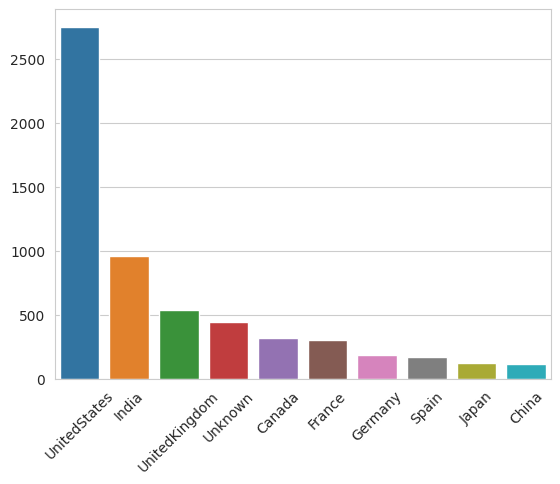

In [ ]:
fig = sns.barplot(x=country_name, y=country_val)
fig.set_xticklabels(country_name, rotation=45)

In [ ]:
netflix_movies['listed_in']

0                                          Documentaries
6                               Children & Family Movies
7       Dramas, Independent Movies, International Movies
9                                       Comedies, Dramas
12                          Dramas, International Movies
                              ...                       
8801             Dramas, International Movies, Thrillers
8802                      Cult Movies, Dramas, Thrillers
8804                             Comedies, Horror Movies
8805                  Children & Family Movies, Comedies
8806      Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 6131, dtype: object

In [ ]:
from collections import Counter

genres = list(netflix_movies['listed_in'])
movie_genres = []

for genre in genres:
  genre = list(genre.split(','))
  for i in genre:
    movie_genres.append(i.replace(' ', ''))

genre_df = Counter(movie_genres)

In [ ]:
genre_df = sorted(genre_df.items(), key=lambda item: genre_df[item[0]],
                  reverse=True)
genre_df

[('InternationalMovies', 2752),
 ('Dramas', 2427),
 ('Comedies', 1674),
 ('Documentaries', 869),
 ('Action&Adventure', 859),
 ('IndependentMovies', 756),
 ('Children&FamilyMovies', 641),
 ('RomanticMovies', 616),
 ('Thrillers', 577),
 ('Music&Musicals', 375),
 ('HorrorMovies', 357),
 ('Stand-UpComedy', 343),
 ('Sci-Fi&Fantasy', 243),
 ('SportsMovies', 219),
 ('ClassicMovies', 116),
 ('LGBTQMovies', 102),
 ('AnimeFeatures', 71),
 ('CultMovies', 71),
 ('Faith&Spirituality', 65),
 ('Movies', 57)]

In [ ]:
genre_name = [name for name, value in genre_df]
genre_name

['InternationalMovies',
 'Dramas',
 'Comedies',
 'Documentaries',
 'Action&Adventure',
 'IndependentMovies',
 'Children&FamilyMovies',
 'RomanticMovies',
 'Thrillers',
 'Music&Musicals',
 'HorrorMovies',
 'Stand-UpComedy',
 'Sci-Fi&Fantasy',
 'SportsMovies',
 'ClassicMovies',
 'LGBTQMovies',
 'AnimeFeatures',
 'CultMovies',
 'Faith&Spirituality',
 'Movies']

In [ ]:
genre_values = [value for name, value in genre_df]
genre_values

[2752,
 2427,
 1674,
 869,
 859,
 756,
 641,
 616,
 577,
 375,
 357,
 343,
 243,
 219,
 116,
 102,
 71,
 71,
 65,
 57]

Text(0.5, 1.0, 'Genres')

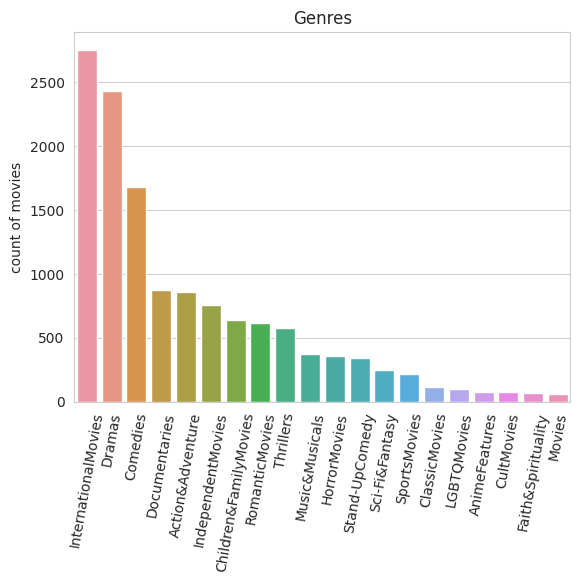

In [ ]:
fig = sns.barplot(x=genre_name, y=genre_values)

fig.set_xticklabels(genre_name, rotation=80)
fig.set_ylabel('count of movies')
fig.set_title('Genres')

**EDA сериалов**

In [ ]:
netflix_shows.isna().sum()

show_id            0
type               0
title              0
director        2446
cast             350
country          391
date_added        10
release_year       0
rating             2
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
netflix_shows['country'].fillna('Unknown', inplace=True)
netflix_shows.isna().sum()

show_id            0
type               0
title              0
director        2446
cast             350
country            0
date_added        10
release_year       0
rating             2
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
netflix_shows['country'].value_counts()

United States                                    760
Unknown                                          391
United Kingdom                                   213
Japan                                            169
South Korea                                      158
                                                ... 
Belarus                                            1
United Kingdom, Australia                          1
France, Australia, Germany                         1
Australia, New Zealand, United States              1
United States, France, South Korea, Indonesia      1
Name: country, Length: 197, dtype: int64

In [ ]:
# создам {словарь} и разделю [список] из стран на отдельные страны
country_shows = {}
country = list(netflix_shows['country'])
for countries in country:
  countries = countries.replace(' ', '')
  countries = list(countries.split(','))
# добавить значение, если оно есть в списке
  for i in countries:
    if i in list(country_shows.keys()):
      country_shows[i]+=1
    else:
      country_shows[i]=1

In [ ]:
country_shows

{'SouthAfrica': 11,
 'Unknown': 391,
 'India': 84,
 'UnitedKingdom': 272,
 'UnitedStates': 938,
 'Mexico': 58,
 'Turkey': 30,
 'Australia': 66,
 'Finland': 4,
 'Nigeria': 9,
 'Japan': 199,
 'Belgium': 12,
 'France': 90,
 'SouthKorea': 170,
 'Spain': 61,
 'Singapore': 23,
 'Russia': 16,
 '': 1,
 'Ireland': 14,
 'Italy': 25,
 'Argentina': 20,
 'Jordan': 2,
 'Colombia': 32,
 'Israel': 11,
 'Taiwan': 70,
 'Germany': 44,
 'Canada': 126,
 'Poland': 9,
 'Thailand': 24,
 'NewZealand': 8,
 'Netherlands': 8,
 'Sweden': 11,
 'China': 48,
 'Iceland': 3,
 'Denmark': 14,
 'Philippines': 3,
 'Indonesia': 4,
 'UnitedArabEmirates': 1,
 'Norway': 9,
 'CzechRepublic': 6,
 'Lebanon': 7,
 'Brazil': 31,
 'Uruguay': 1,
 'Egypt': 15,
 'Luxembourg': 2,
 'Senegal': 1,
 'SaudiArabia': 4,
 'Kuwait': 3,
 'Belarus': 1,
 'Chile': 5,
 'Malta': 1,
 'PuertoRico': 1,
 'Austria': 1,
 'Cyprus': 1,
 'Malaysia': 8,
 'Mauritius': 1,
 'HongKong': 5,
 'Croatia': 1,
 'WestGermany': 2,
 'Syria': 1,
 'Hungary': 1,
 'Cuba': 1,
 'G

In [ ]:
# сортировка по ключу, а не по стране
country_shows_sort = sorted(country_shows.items(),\
                             key=lambda item: country_shows[item[0]],\
                             reverse=True)
country_shows_sort = country_shows_sort[:10]
country_shows_sort

[('UnitedStates', 938),
 ('Unknown', 391),
 ('UnitedKingdom', 272),
 ('Japan', 199),
 ('SouthKorea', 170),
 ('Canada', 126),
 ('France', 90),
 ('India', 84),
 ('Taiwan', 70),
 ('Australia', 66)]

In [ ]:
# вытащу страну (для графика)
country_name = [name for name, value in country_shows_sort]
country_name

['UnitedStates',
 'Unknown',
 'UnitedKingdom',
 'Japan',
 'SouthKorea',
 'Canada',
 'France',
 'India',
 'Taiwan',
 'Australia']

In [ ]:
# и значение (для графика)
country_val = [value for name, value in country_shows_sort]
country_val

[938, 391, 272, 199, 170, 126, 90, 84, 70, 66]

[Text(0, 0, 'UnitedStates'),
 Text(1, 0, 'Unknown'),
 Text(2, 0, 'UnitedKingdom'),
 Text(3, 0, 'Japan'),
 Text(4, 0, 'SouthKorea'),
 Text(5, 0, 'Canada'),
 Text(6, 0, 'France'),
 Text(7, 0, 'India'),
 Text(8, 0, 'Taiwan'),
 Text(9, 0, 'Australia')]

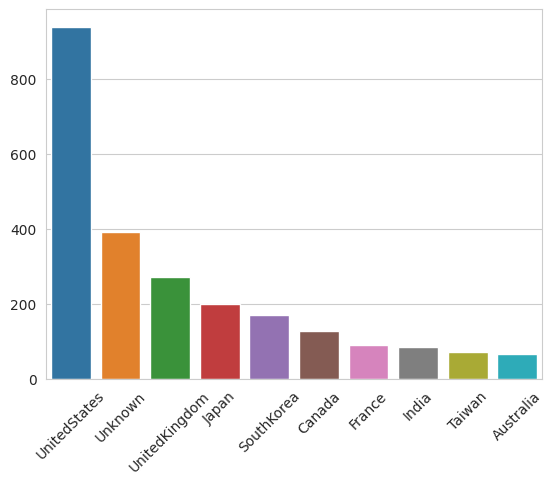

In [ ]:
fig = sns.barplot(x=country_name, y=country_val)
fig.set_xticklabels(country_name, rotation=45)

*США лидируют как в фильмах, так и в сериалах. Великобритания также замыкает топ-3, однако Индия в выпуске сериалов занимает лишь 8 место, в то время как в фильмах боливуд занимает 2 место*

**Система рекомендаций**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
netflix_movies['description'] = netflix_movies['description'].fillna('')
netflix_movies['description'].isna().sum()

0

In [ ]:
netflix_movies['description']

0       As her father nears the end of his life, filmm...
6       Equestria's divided. But a bright-eyed hero be...
7       On a photo shoot in Ghana, an American model s...
9       A woman adjusting to life after a loss contend...
12      After most of her family is murdered in a terr...
                              ...                        
8801    Recovering alcoholic Talal wakes up inside a s...
8802    A political cartoonist, a crime reporter and a...
8804    Looking to survive in a world taken over by zo...
8805    Dragged from civilian life, a former superhero...
8806    A scrappy but poor boy worms his way into a ty...
Name: description, Length: 6131, dtype: object

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(netflix_movies['description'])
tfidf_matrix.shape

# 15483 слово, которое описывает 6131 фильм

(6131, 15483)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.01624469,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.03650444],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.01624469, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.03650444, ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
cosine_sim.shape

(6131, 6131)

In [ ]:
indices = pd.Series(netflix_movies.index, index=netflix_movies['title']).drop_duplicates()
indices

title
Dick Johnson Is Dead                   0
My Little Pony: A New Generation       6
Sankofa                                7
The Starling                           9
Je Suis Karl                          12
                                    ... 
Zinzana                             8801
Zodiac                              8802
Zombieland                          8804
Zoom                                8805
Zubaan                              8806
Length: 6131, dtype: int64

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim)

cosine_sim_df.columns = indices.index

cosine_sim_df['title'] = indices.index
cosine_sim_df = cosine_sim_df.set_index('title')

cosine_sim_df.head()

title,Dick Johnson Is Dead,My Little Pony: A New Generation,Sankofa,The Starling,Je Suis Karl,Confessions of an Invisible Girl,Europe's Most Dangerous Man: Otto Skorzeny in Spain,Intrusion,Avvai Shanmughi,Go! Go! Cory Carson: Chrissy Takes the Wheel,...,Young Tiger,"Yours, Mine and Ours",اشتباك,Zed Plus,Zenda,Zinzana,Zodiac,Zombieland,Zoom,Zubaan
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,1.000000,0.0,0.0,0.018285,0.000000,0.0,0.014848,0.0,0.023927,0.0,...,0.0,0.02889,0.0,0.0,0.0,0.0,0.0,0.000000,0.016245,0.000000
My Little Pony: A New Generation,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
Sankofa,0.000000,0.0,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.029736,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.036504
The Starling,0.018285,0.0,0.0,1.000000,0.029133,0.0,0.016294,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.061674,0.017826,0.045998
Je Suis Karl,0.000000,0.0,0.0,0.029133,1.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.028473


In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim_df):
  idx = indices[title]
  # получаем похожесть для данного фильма
  sim_scores = list(enumerate(cosine_sim_df.loc[title]))

  # сортируем фильмы, основываясь на похожести
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
  sim_scores = sim_scores[1:11]
  # получаем индексы фильма
  movie_indices = [i[0] for i in sim_scores]

  return netflix_movies['title'].iloc[movie_indices]

*Рекомендации, основанные на сюжете:*

In [ ]:
netflix_movies['title'].sample()

6142    American Heist
Name: title, dtype: object

In [ ]:
netflix_movies[netflix_movies['title'] == 'American Heist'].description.iloc[0]

'An ex-con is just getting his life back on track when his older brother is released from prison and drags him into the underworld for one final heist.'

In [ ]:
get_recommendations('American Heist')

6736                                       Familiye
2043                                        Villain
3023                                 Eye For An Eye
2196                                     Redemption
352                           The Edge of Seventeen
6844                                         Ghayal
2837    Twin Murders: the Silence of the White City
1950                                       Time Out
5512                                   Small Crimes
3362                   Arsenio Hall: Smart & Classy
Name: title, dtype: object

In [ ]:
netflix_movies[netflix_movies['title'] == 'Familiye'].description.iloc[0]

'An ex-con struggles to take care of his two brothers, a gambling addict and a young man with Down syndrome, after being released from prison.'